# 1. Business Problem

#2.Data Gathering

In [10]:
import pandas as pd 
df=pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
285,7.60,146,26,11,261,131,Medium,39,10,Yes,Yes
225,6.68,107,25,0,412,82,Bad,36,14,Yes,No
60,8.32,122,102,19,469,123,Bad,29,13,Yes,Yes
155,7.71,98,72,0,59,69,Medium,65,16,Yes,No
298,10.98,148,63,0,312,130,Good,63,15,Yes,No


#3.EDA(Exploratory Data Analysis )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [14]:
df.shape

(400, 11)

In [16]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns 

#3.1 Working with numerical 

In [41]:
# histogroam 
def col_histogram(col)  :  
    sns.histplot(df[col])

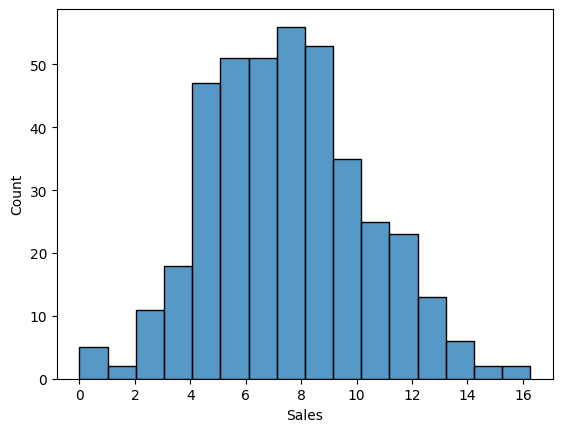

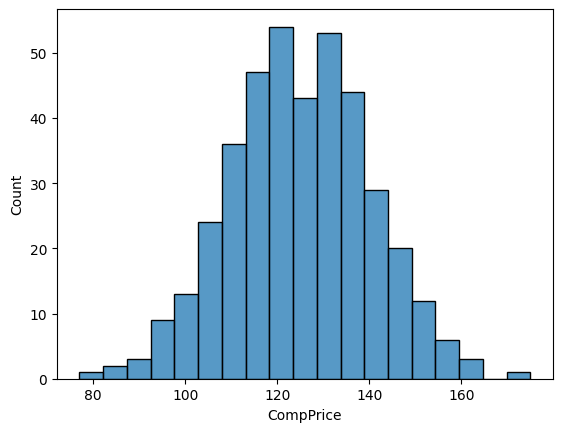

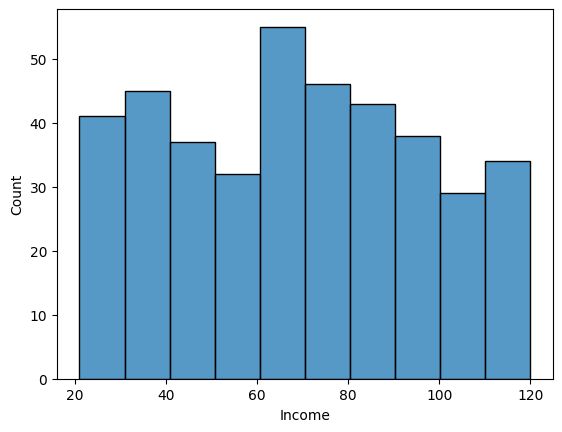

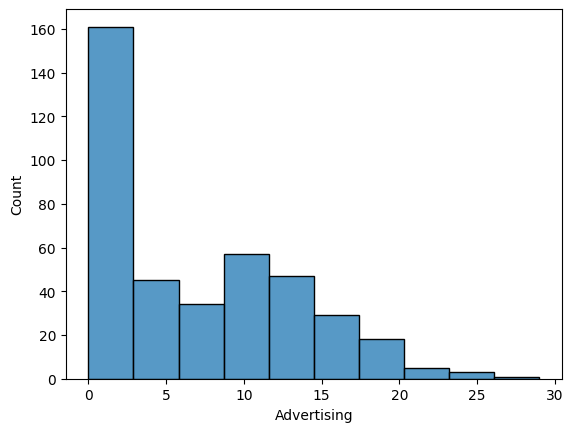

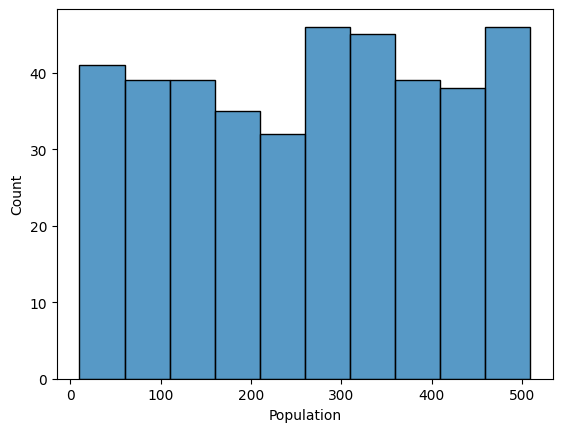

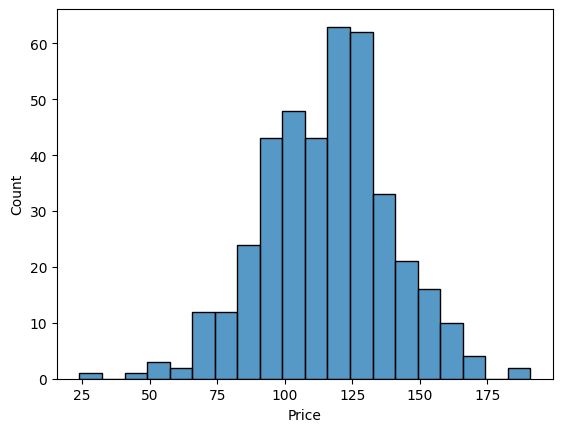

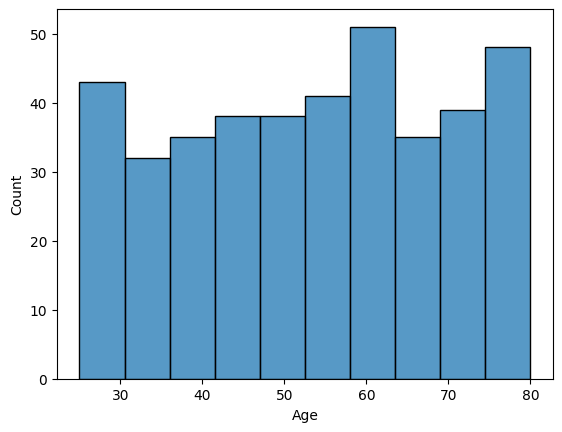

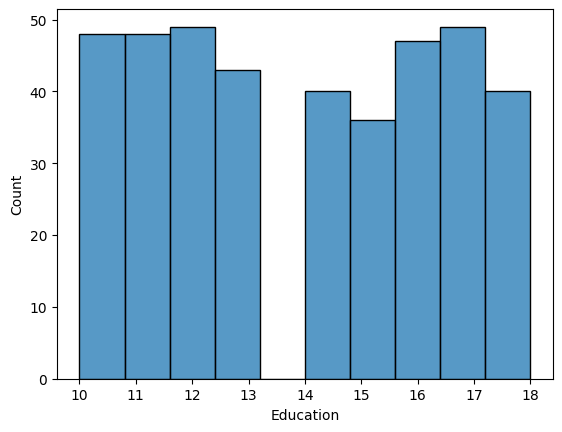

In [43]:
num=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education']
for i in num: 
    col_histogram(i)
    plt.show()

In [47]:
def col_displot(col) : 
    sns.displot(df, x=col, kind="kde")

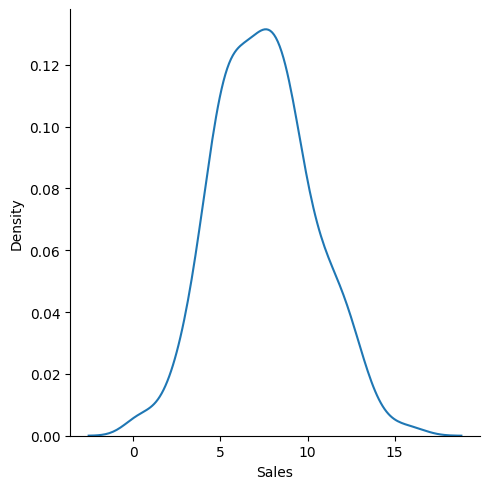

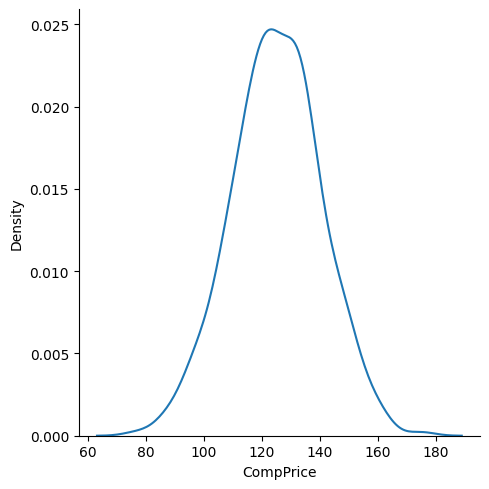

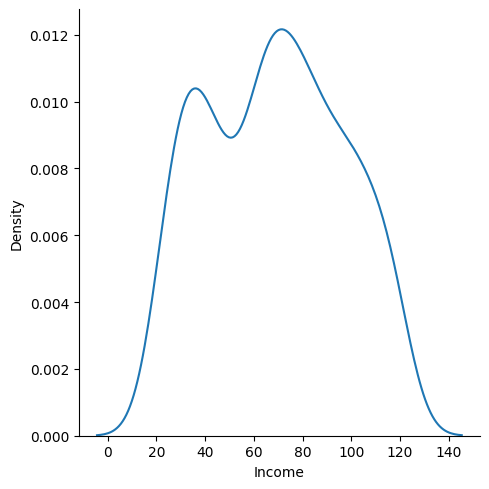

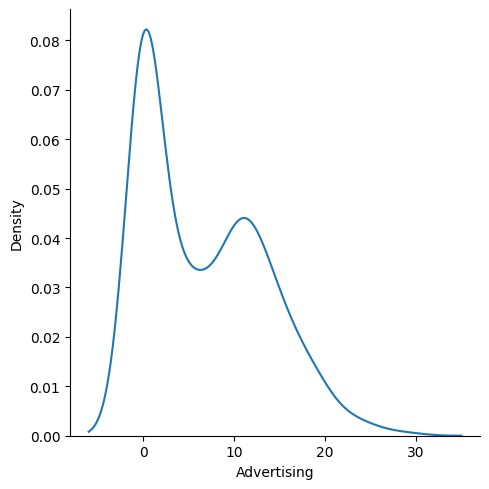

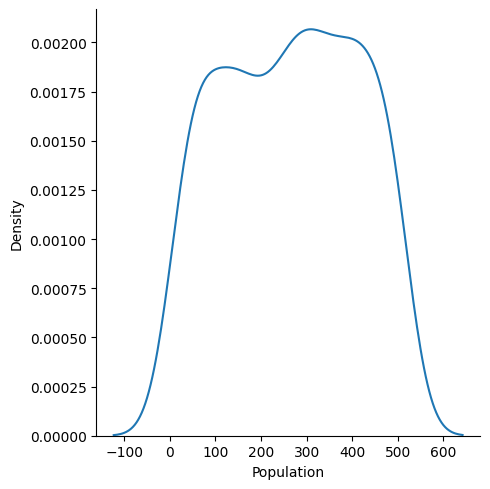

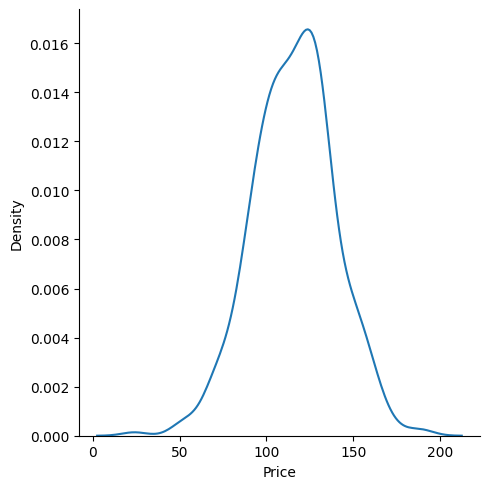

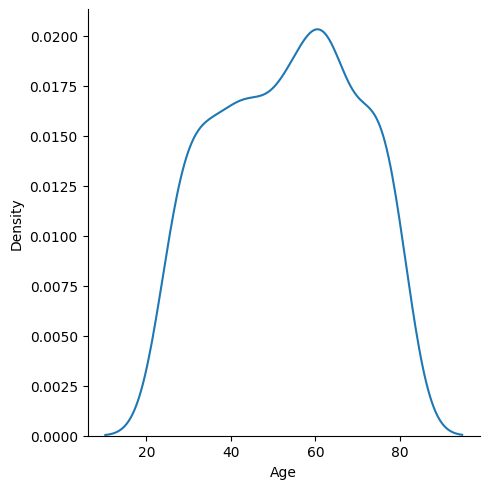

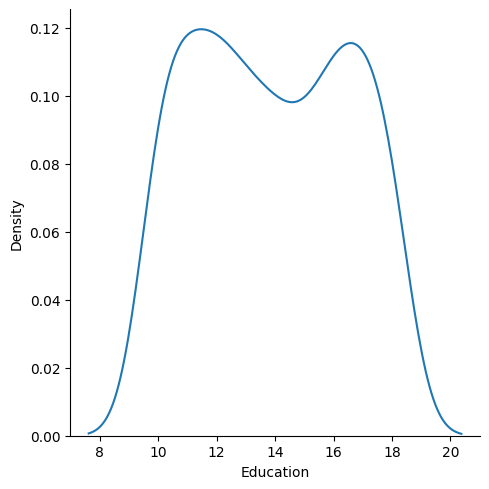

In [49]:
for i in num: 
    col_displot(i)
    plt.show()

In [51]:
# Power transformer on given graphs 
#1) Income , Advertising  , Education

In [53]:
#outer ditation 
def box_plot(col): 
    sns.boxplot(df[col]) 

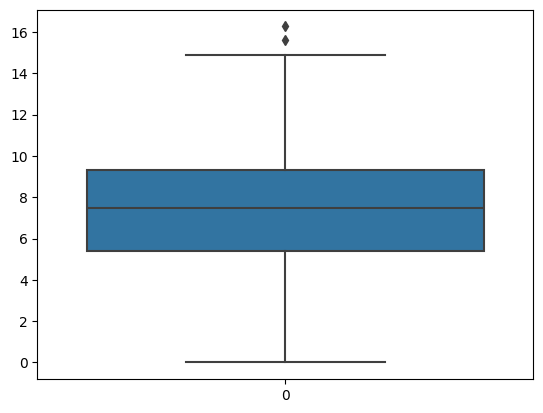

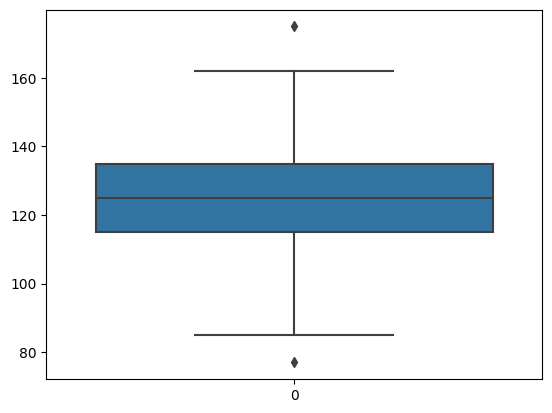

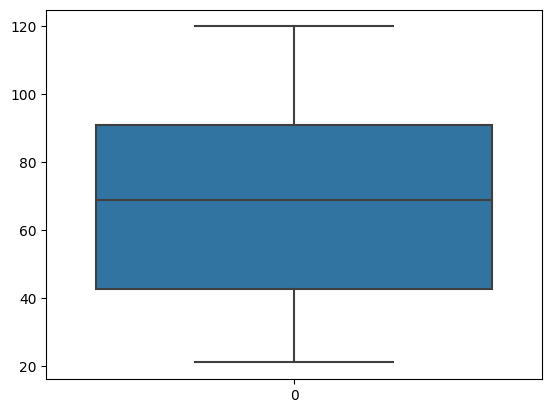

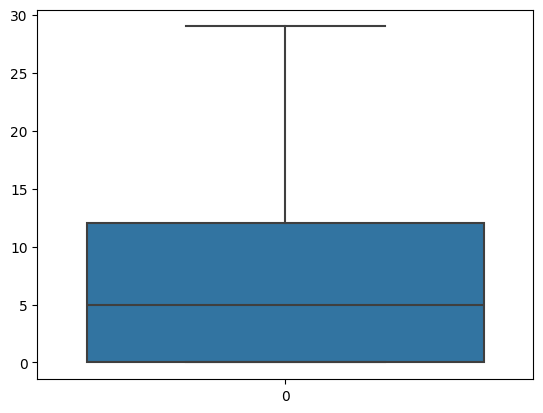

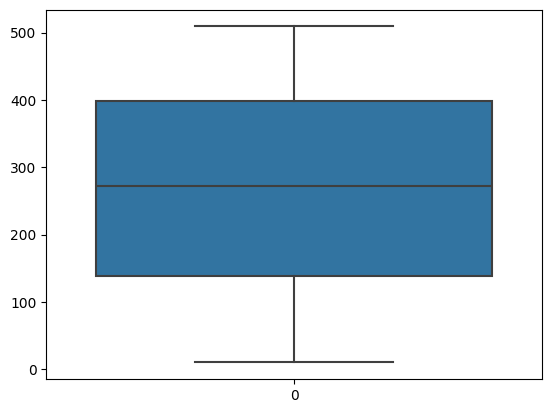

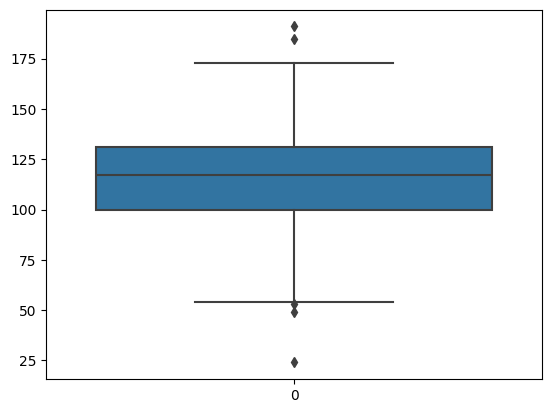

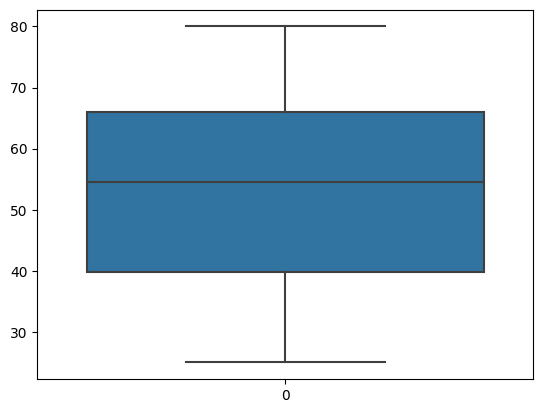

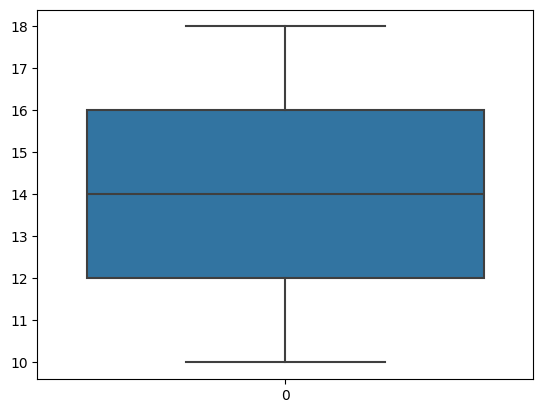

In [55]:
for i in num : 
    box_plot(i)
    plt.show()

In [56]:
# no outler in data 

#3.2catgory

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [39]:
cat=['ShelveLoc','Urban','US'] 

In [42]:
# heat map 
k=pd.crosstab(df['ShelveLoc'],df['Urban'])
k

Urban,No,Yes
ShelveLoc,,
Bad,22,74
Good,28,57
Medium,68,151


In [60]:
k=pd.crosstab(df['ShelveLoc'],df['US'])
k

US,No,Yes
ShelveLoc,,
Bad,34,62
Good,24,61
Medium,84,135


In [46]:
k=pd.crosstab(df['Urban'],df['US'])
k

US,No,Yes
Urban,,
No,46,72
Yes,96,186


#4.Preprocessing 

In [65]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder 
lab= LabelEncoder() 

In [67]:
set(df['ShelveLoc'])

{'Bad', 'Good', 'Medium'}

In [69]:
ord=OrdinalEncoder(categories=[['Bad','Medium','Good']])

In [71]:
df['ShelveLoc']=ord.fit_transform(df[['ShelveLoc']])

In [73]:
df.sample(4)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
269,5.01,159,69,0,438,166,1.0,46,17,Yes,No
184,9.95,132,33,7,35,97,1.0,60,11,No,Yes
82,11.62,151,83,4,325,139,2.0,28,17,Yes,Yes
141,6.53,140,42,0,331,131,0.0,28,15,Yes,No


In [75]:
df['ShelveLoc'].value_counts()

1.0    219
0.0     96
2.0     85
Name: ShelveLoc, dtype: int64

In [77]:
df['Urban']=lab.fit_transform(df['Urban'])

In [79]:
df['US']=lab.fit_transform(df['US'])

In [81]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1,1
1,11.22,111,48,16,260,83,2.0,65,10,1,1
2,10.06,113,35,10,269,80,1.0,59,12,1,1
3,7.40,117,100,4,466,97,1.0,55,14,1,1
4,4.15,141,64,3,340,128,0.0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2.0,33,14,1,1
396,6.14,139,23,3,37,120,1.0,55,11,0,1
397,7.41,162,26,12,368,159,1.0,40,18,1,1
398,5.94,100,79,7,284,95,0.0,50,12,1,1


#4.Spliting of Data   

In [115]:
from sklearn.model_selection import train_test_split 

In [116]:
X=df.iloc[:,:-1]
y=df[['US']]

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#5.Model Selection 

In [120]:
!pip install xgboost

In [138]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier


In [140]:
clf1=DecisionTreeClassifier()
clf2=RandomForestClassifier()
clf3=XGBClassifier()

In [142]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
clf2.fit(X_train,y_train)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [146]:
clf3=clf3.fit(X_train,y_train)

In [148]:
#prediction 
y_pre1=clf1.predict(X_test)
y_pre2=clf2.predict(X_test)
y_pre3=clf3.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pre1)

0.8

In [152]:
accuracy_score(y_test,y_pre2)

0.925

In [154]:
accuracy_score(y_test,y_pre3)

0.9125

In [156]:
# for traing data 
y_train_p1=clf1.predict(X_train)
y_train_p2=clf2.predict(X_train)
y_train_p3=clf3.predict(X_train)

In [158]:
print(accuracy_score(y_train,y_train_p1))
print(accuracy_score(y_train,y_train_p2))
print(accuracy_score(y_train,y_train_p3))

1.0
1.0
1.0


In [160]:
# over fiting on data 

In [162]:
#Random forest is given good result 

#7.conclusion

After performing the Decision Tree and Random Forest models, I understand that a cloth manufacturing company is interested in analyzing sales. The objective is to build a predictive model with Sales as the target variable, focusing specifically on urban locations. This approach helps the company make data-driven decisions to optimize performance in key urban markets.